# 1. Introduction
### Zipf's Law Distribution

Zipf's Law is an empirical law that describes the frequency of certain events as a power-law distribution. It applies in various domains such as linguistics, population sizes, and web traffic, etc. In natural language, Zipf’s Law is observed in the way that the **frequency of a word** is ***inversely proportional*** to its **rank** in the frequency table.

 $$
f(r) \propto \frac{C}{r^s}
$$

Where:
- $r$ is the rank of the word,
- $f(r)$ is the frequency of the word in rank r,
- $C$ is a constant,
- $s$ is a constant close to 1, but typically > 1 in real world data.

This means that the higher the rank, the lower the frequency, with the most frequent event (rank 1) having the highest frequency, and subsequent events decreasing in frequency according to their rank.


#### Formula

The **probability mass function** (PMF) of Zipf's Law is given by:

$$
P(x) = \frac {1 / x^s}{\sum_{n=1}^{N} 1 / n^s}
$$

Where:
- $P(x)$ is the probability of the event at rank $x$,
- $x$ is the rank of the event (starting from 1),
- $s$ is the exponent characterizing the distribution (typically ($s$ > 1)),
- $N$ is the number of elements in the population,
- $ \sum_{n=1}^{N} \frac{1}{n^s} $ represents the normalizing constant, which ensures that the probabilities sum to 1. This is known as the generalized harmonic number.


#### Example

In the case of words in a large text, if the most frequent word occurs 1000 times, then the second most frequent word might occur approximately 500 times, the third about 333 times, and so on.

# 2. Coding ideas
### Goal
Find if Zipf's Law exists in texts.

### Steps
#### 1. Preprocessing.
1. Read text files into python.
2. Tokenize and convert words to lowercase.
3. Remove punctuation and numbers.

In [1]:
import nltk


# Preprocess text
def preprocess_text(text):
    words = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    words = [word for word in words if word.isalpha()]  # Remove punctuation/numbers
    return words


#### 2. Get word frequencies and ranks of words.

In [2]:
from collections import Counter


# Compute word frequencies
def get_word_frequencies(words):
    return Counter(words)

#### I integrate the previous 2 steps in one function

In [3]:
import os


# Read and collect word frequencies from directory
def read_and_collect_frequencies_from_directory(directory_path):
    all_frequencies = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".txt"):  # Only read .txt files
            file_path = os.path.join(directory_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                text = file.read()  # Read the text file
                words = preprocess_text(text)  # Preprocess the text (tokenize, lowercase, remove punctuation)
                frequencies = get_word_frequencies(words)  # Get word frequencies
                all_frequencies.append((filename, frequencies))  # Store file name and its frequencies
    return all_frequencies

#### 3. Check Zipf's Law if exists by using Q-Q Plot
1. Get the theoretical Zipf's Law distribution.
2. Plot Q-Q Plot.

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Create theoretical Zipf distribution
def get_theoretical_zipf_distribution(num_words, s):
    ranks = np.arange(1, num_words + 1)
    theoretical_zipf = 1 / (ranks ** s)  # Theoretical Zipf distribution
    theoretical_zipf /= np.sum(theoretical_zipf)  # Normalize to make it a probability distribution
    return theoretical_zipf


# Get Q-Q Plot for each txt file, and set paremeter as 1.15
def plot_qq_for_zipf_law(all_frequencies, s, row, col):
    k = 0
    plt.figure(figsize=(15, 20))
    for filename, frequencies in all_frequencies:
        # Step 1: Get the word frequencies sorted in descending order
        word_counts = np.array([count for word, count in frequencies.most_common()])
        num_words = len(word_counts)
        all_words = np.sum(word_counts)

        print('Summary of ', filename, ':')
        print('Number of unique words: ', num_words)
        print('Number of all words: ', all_words)
        print('\n')

        # Step 2: Create the theoretical Zipf' Law distribution
        theoretical_zipf = get_theoretical_zipf_distribution(num_words, s)

        # Step 3: Normalize word counts to make them a probability distribution
        word_probabilities = word_counts / np.sum(word_counts)

        # Step 4: Get Quantiles (CMF)
        zipf_quantile = np.cumsum(theoretical_zipf)
        word_quantile = np.cumsum(word_probabilities)

        # Step 5: Generate the QQ plot
        k = k + 1
        plt.subplot(row, col, k)
        plt.scatter(zipf_quantile, word_quantile, alpha=0.6, label='Actual vs Theoretical')

        # Plot a reference line (y=x) to visualize deviation from Zipf' law
        max_val = max(max(zipf_quantile), max(word_quantile))
        plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

        plt.title(f'QQ Plot for Zipf Law - {filename} ratio:{round(num_words/all_words,2)}')
        plt.xlabel('Theoretical Quantiles (Zipf)')
        plt.ylabel('Actual Quantiles (Word Frequencies)')
        plt.grid(True)
        plt.legend()
    plt.tight_layout()
    plt.show()

# Experiments
#### 1. Compare 10 human-written texts with AI-generated texts.

Summary of  10.txt :
Number of unique words:  715
Number of all words:  2387


Summary of  9.txt :
Number of unique words:  532
Number of all words:  1437


Summary of  8.txt :
Number of unique words:  3071
Number of all words:  13751


Summary of  5.txt :
Number of unique words:  1178
Number of all words:  4736


Summary of  4.txt :
Number of unique words:  1636
Number of all words:  8371


Summary of  6.txt :
Number of unique words:  1770
Number of all words:  10121


Summary of  7.txt :
Number of unique words:  3132
Number of all words:  13004


Summary of  3.txt :
Number of unique words:  2193
Number of all words:  14851


Summary of  2.txt :
Number of unique words:  1093
Number of all words:  5264


Summary of  1.txt :
Number of unique words:  1554
Number of all words:  5337


Summary of  AI_text_1.txt :
Number of unique words:  531
Number of all words:  1096


Summary of  AI_text_2.txt :
Number of unique words:  397
Number of all words:  39652




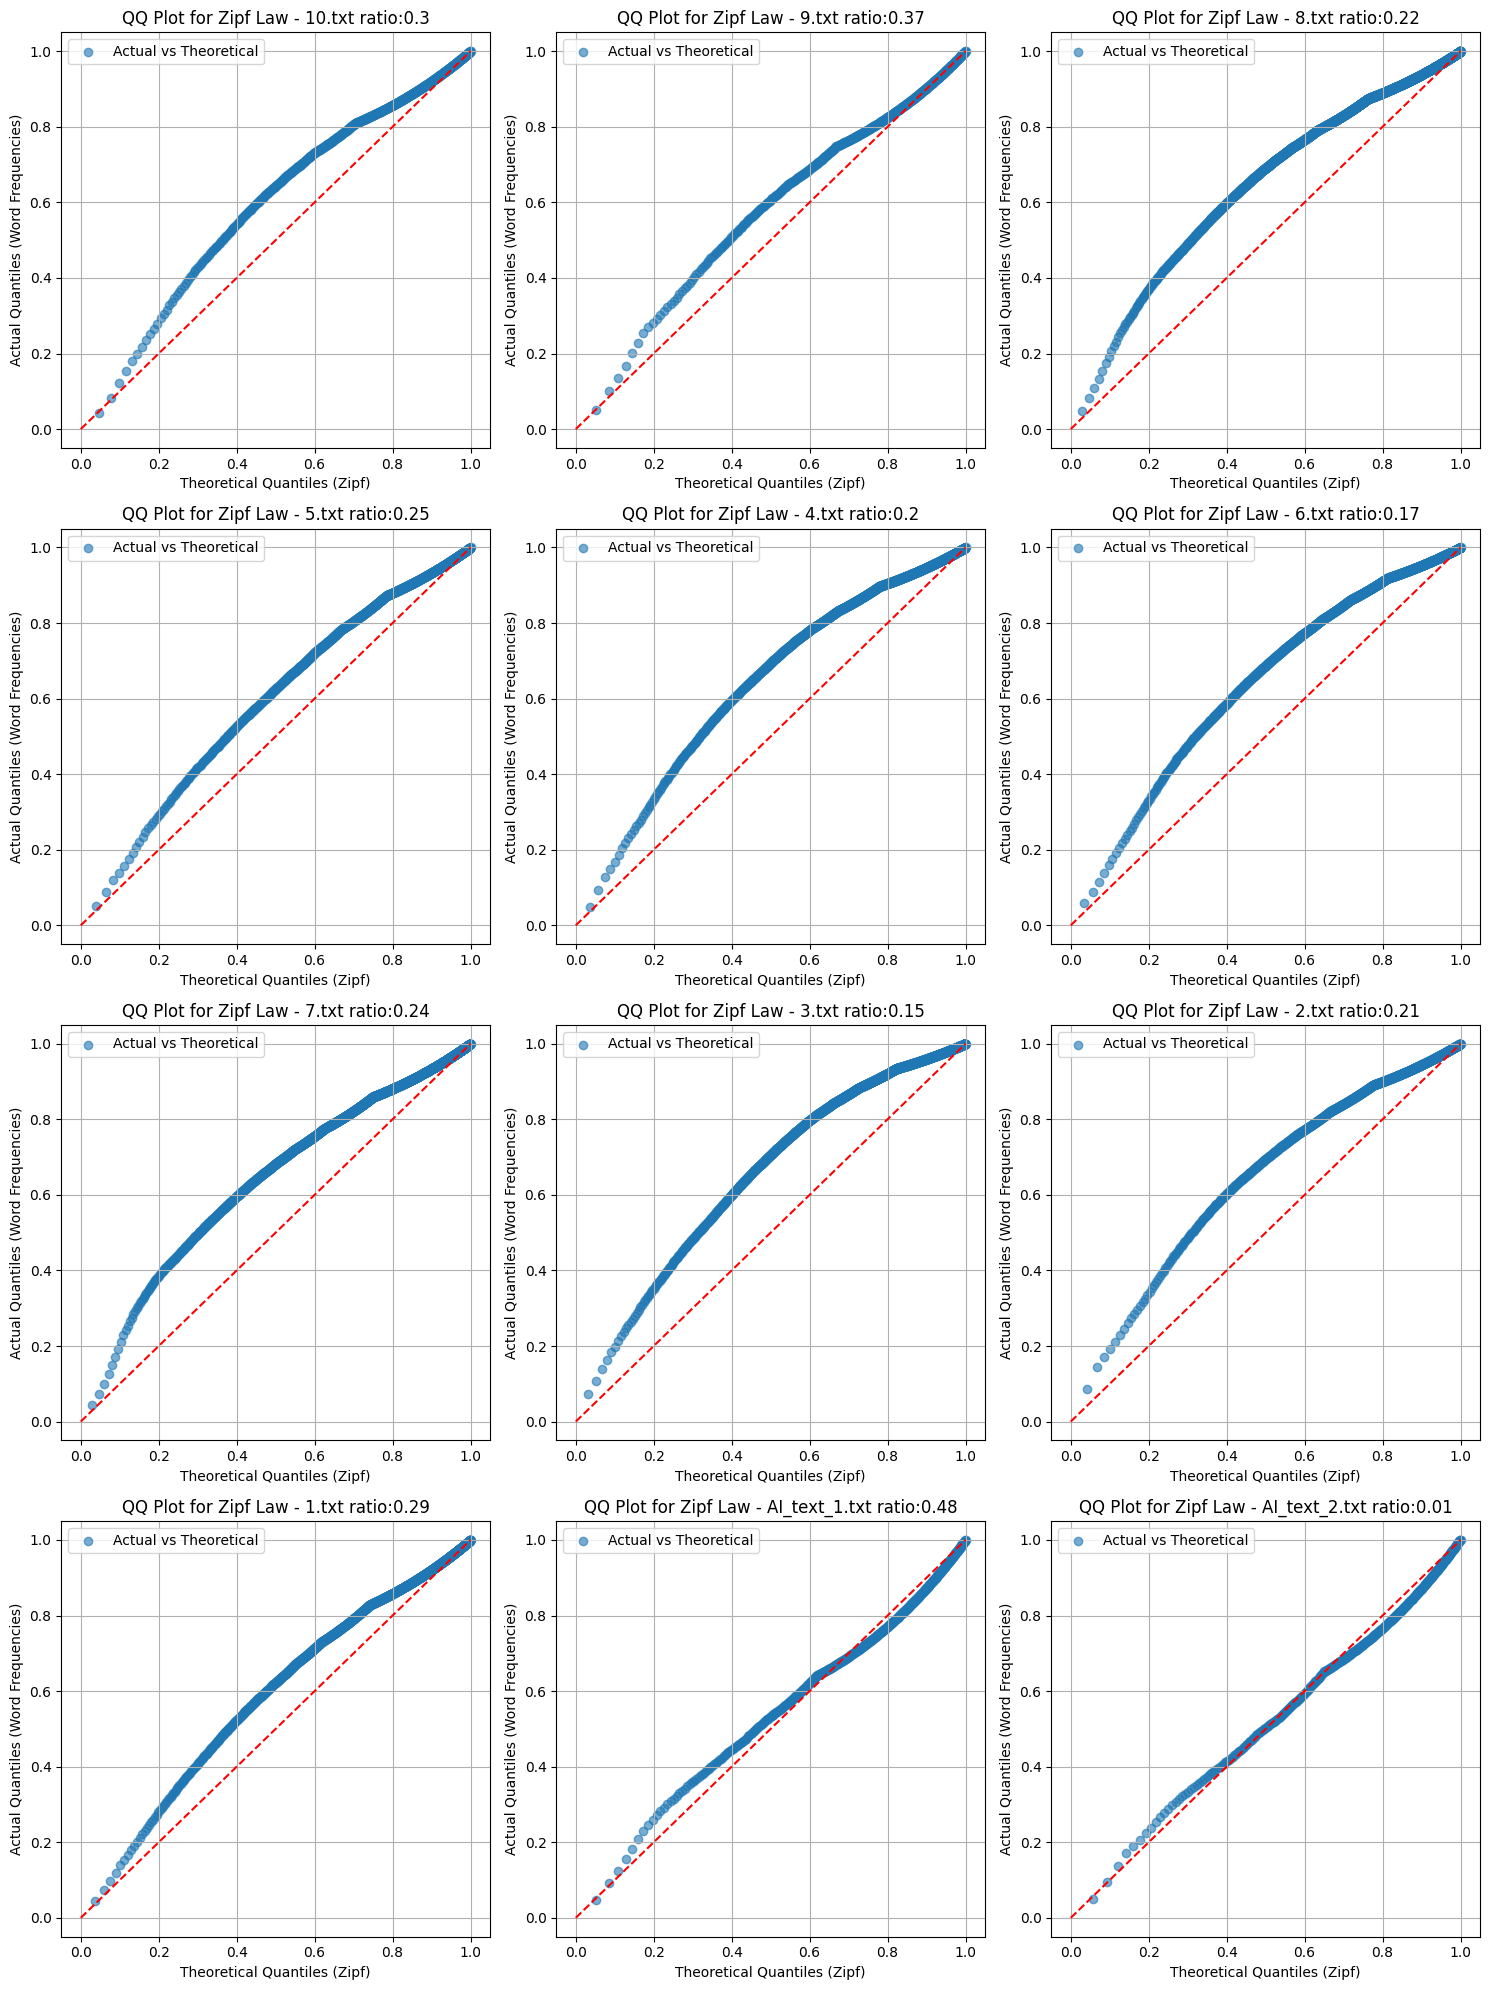

In [5]:
human_texts_path = 'human'
AI_texts_path = 'AI'

human_frequencies = read_and_collect_frequencies_from_directory(human_texts_path)
AI_frequencies = read_and_collect_frequencies_from_directory(AI_texts_path)
all_frequencies = human_frequencies + AI_frequencies

plot_qq_for_zipf_law(all_frequencies, s=.7, row=4, col=3)

#### Conclusion for Experiment 1
The existence of Zipf' Law distribution may depend on its **parameter** $s$, **file length**, and **number of unique words**. In this case, when $s$ is greater than 1, none of these texts follow the Zipf'Law distribution. When $s$ is less than 1, the human-written texts match the Zipf' Law distribution, while AI-generated text doesn’t. We can infer that these human-written texts have lower vocabulary diversity, which means a few common words are used repetitively, while rare words are used more frequently than expected in a typical Zipf distribution.

Possible cases with $s<1$:
1. **Highly repetitive text**: Technical manuals, legal documents, etc.
2. **Short text**: Texts in SMS communication.

#### Human-written text resources:
1.	https://arxiv.org/pdf/2408.04237
2.	https://proceedings.neurips.cc/paper_files/paper/2022/file/a1a90fbba98b417c7cf53e75eb4ac933-Paper-Conference.pdf
3.	https://arxiv.org/pdf/2409.08728
4.	https://arxiv.org/pdf/2409.08701
5.	https://arxiv.org/pdf/2406.15619
6.	https://arxiv.org/pdf/2403.10220
7.	https://en.wikipedia.org/wiki/Machine_learning
8.	https://en.wikipedia.org/wiki/Neural_network_(machine_learning)
9.	https://millercenter.org/the-presidency/presidential-speeches/january-20-2017-inaugural-address
10.	https://millercenter.org/the-presidency/presidential-speeches/january-20-2021-inaugural-address

#### AI-generated text resources:
ChatGPT 4o

#### 2. Compare 10 Papers from 2022 NeurIPS with 10 from 2023 NeurIPS

Summary of  2022-8.txt :
Number of unique words:  1604
Number of all words:  6666


Summary of  2022-9.txt :
Number of unique words:  1896
Number of all words:  8110


Summary of  2022-4.txt :
Number of unique words:  1293
Number of all words:  6985


Summary of  2022-10.txt :
Number of unique words:  1412
Number of all words:  6467


Summary of  2022-5.txt :
Number of unique words:  1235
Number of all words:  7267


Summary of  2022-7.txt :
Number of unique words:  1663
Number of all words:  7588


Summary of  2022-6.txt :
Number of unique words:  1448
Number of all words:  5606


Summary of  2022-2.txt :
Number of unique words:  1489
Number of all words:  7430


Summary of  2022-3.txt :
Number of unique words:  1789
Number of all words:  7073


Summary of  2022-1.txt :
Number of unique words:  1188
Number of all words:  6055


Summary of  2023-10.txt :
Number of unique words:  1123
Number of all words:  6796


Summary of  2023-8.txt :
Number of unique words:  1460
Number of all words

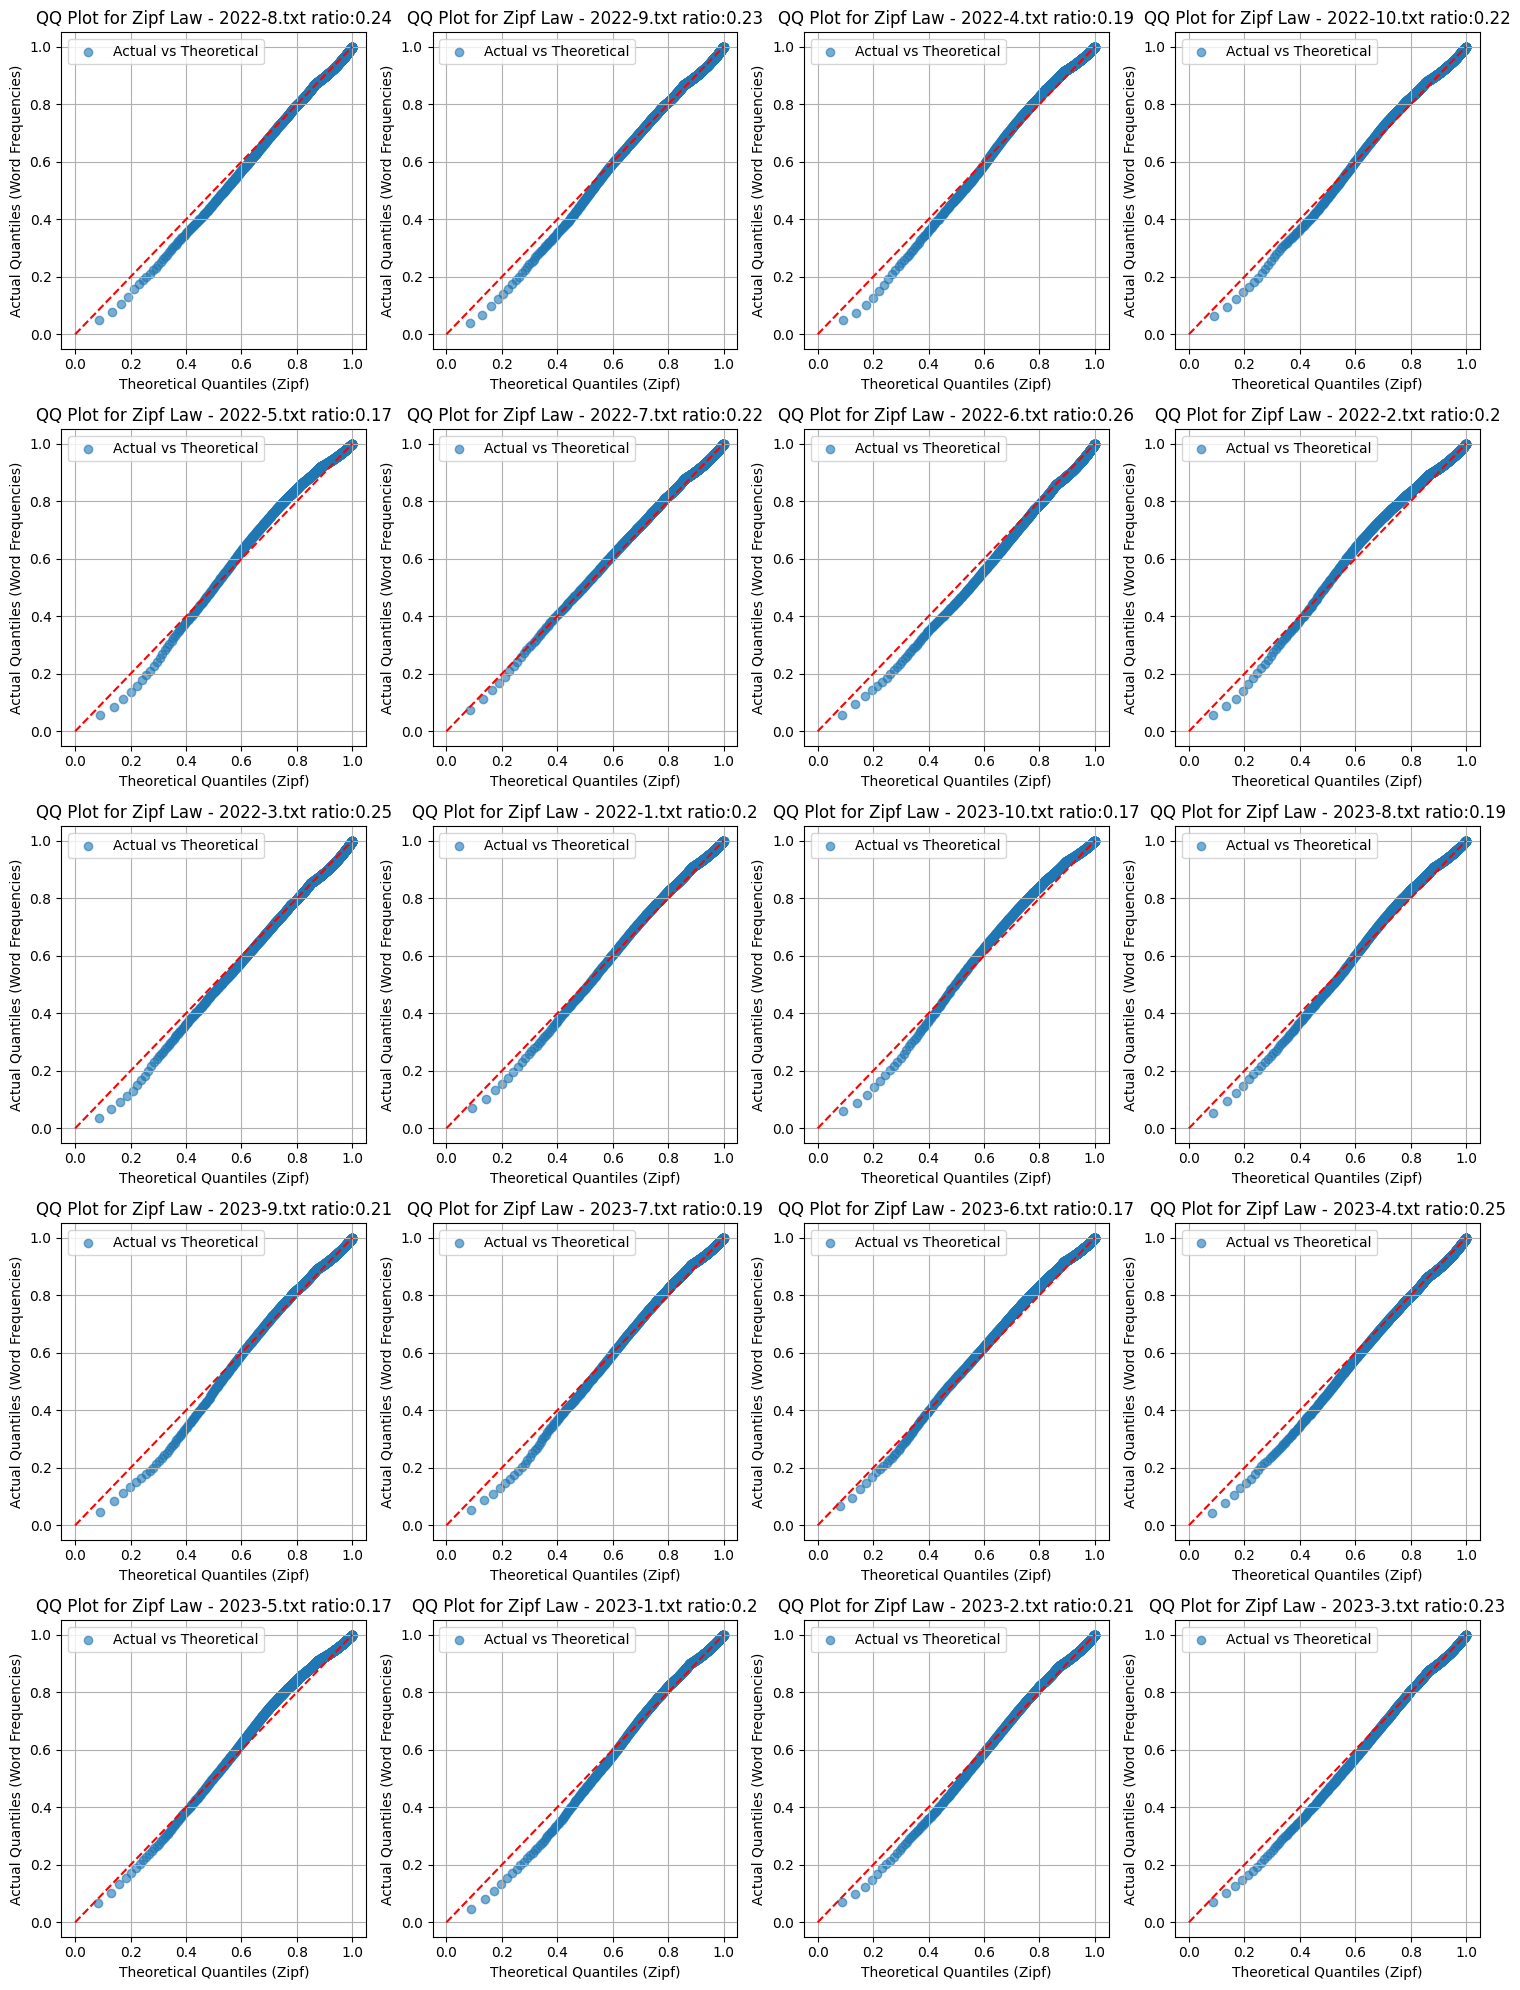

In [6]:
paper2022_path = 'NeurIPS2022'
paper2023_path = 'NeurIPS2023'

paper2022_frequencies = read_and_collect_frequencies_from_directory(paper2022_path)
paper2023_frequencies = read_and_collect_frequencies_from_directory(paper2023_path)
all_frequencies = paper2022_frequencies + paper2023_frequencies

plot_qq_for_zipf_law(all_frequencies, s=.9, row=5, col=4)

#### Conclusion for Experiment 2
It validates the conclusion of Experiment 1. Generally, the parameter $s$ of Zipf' Law distribution in papers is less than 1.

In [7]:
paper2022 = {1: 'NeurIPS-2022-hypothesis-testing-for-differentially-private-linear-regression-Paper-Conference',
             2: 'NeurIPS-2022-fair-rank-aggregation-Paper-Conference',
             3: 'NeurIPS-2022-training-language-models-to-follow-instructions-with-human-feedback-Paper-Conference',
             4: 'NeurIPS-2022-adam-can-converge-without-any-modification-on-update-rules-Paper-Conference',
             5: 'NeurIPS-2022-an-asymptotically-optimal-batched-algorithm-for-the-dueling-bandit-problem-Paper-Conference',
             6: 'NeurIPS-2022-openfwi-large-scale-multi-structural-benchmark-datasets-for-full-waveform-inversion-Paper-Datasets_and_Benchmarks',
             7: 'NeurIPS-2022-effects-of-data-geometry-in-early-deep-learning-Paper-Conference',
             8: 'NeurIPS-2022-uncertainty-estimation-using-riemannian-model-dynamics-for-offline-reinforcement-learning-Paper-Conference',
             9: 'NeurIPS-2022-what-you-see-is-what-you-get-principled-deep-learning-via-distributional-generalization-Paper-Conference',
             10: 'NeurIPS-2022-where-do-models-go-wrong-parameter-space-saliency-maps-for-explainability-Paper-Conference'}

In [8]:
paper2023 = {1: 'NeurIPS-2023-characteristic-circuits-Paper-Conference',
             2: 'NeurIPS-2023-an-empirical-study-towards-prompt-tuning-for-graph-contrastive-pre-training-in-recommendations-Paper-Conference',
             3: 'NeurIPS-2023-newtoncotes-graph-neural-networks-on-the-time-evolution-of-dynamic-systems-Paper-Conference',
             4: 'NeurIPS-2023-siamese-masked-autoencoders-Paper-Conference',
             5: 'NeurIPS-2023-gradorth-a-simple-yet-efficient-out-of-distribution-detection-with-orthogonal-projection-of-gradients-Paper-Conference',
             6: 'NeurIPS-2023-the-cambridge-law-corpus-a-dataset-for-legal-ai-research-Paper-Datasets_and_Benchmarks',
             7: 'NeurIPS-2023-bayesian-learning-via-q-exponential-process-Paper-Conference',
             8: 'NeurIPS-2023-exact-representation-of-sparse-networks-with-symmetric-nonnegative-embeddings-Paper-Conference',
             9: 'NeurIPS-2023-solving-a-class-of-non-convex-minimax-optimization-in-federated-learning-Paper-Conference',
             10: 'NeurIPS-2023-an-improved-relaxation-for-oracle-efficient-adversarial-contextual-bandits-Paper-Conference'}


#### Resources:
#### NeurIPS 2022:
1. https://neurips.cc/virtual/2022/poster/53160
2. https://neurips.cc/virtual/2022/poster/53193
3. https://neurips.cc/virtual/2022/poster/52886
4. https://neurips.cc/virtual/2022/poster/53721
5. https://neurips.cc/virtual/2022/poster/53755
6. https://neurips.cc/virtual/2022/poster/55684
7. https://neurips.cc/virtual/2022/poster/53764
8. https://neurips.cc/virtual/2022/poster/54511
9. https://neurips.cc/virtual/2022/poster/53983
10. https://neurips.cc/virtual/2022/poster/53486

#### NeurIPS 2023:
1. https://neurips.cc/virtual/2023/poster/72798
2. https://neurips.cc/virtual/2023/poster/71323
3. https://neurips.cc/virtual/2023/poster/72416
4. https://neurips.cc/virtual/2023/poster/69963
5. https://neurips.cc/virtual/2023/poster/71976
6. https://neurips.cc/virtual/2023/poster/73448
7. https://neurips.cc/virtual/2023/poster/71346
8. https://neurips.cc/virtual/2023/poster/71337
9. https://neurips.cc/virtual/2023/poster/71586
10. https://neurips.cc/virtual/2023/poster/72491

#### 3. Check parameter $s$ in novels

Summary of  The Three Musketeers.txt :
Number of unique words:  10278
Number of all words:  224434


Summary of  Robinson Crusoe.txt :
Number of unique words:  5961
Number of all words:  121108


Summary of  The Time Machine.txt :
Number of unique words:  4505
Number of all words:  32164




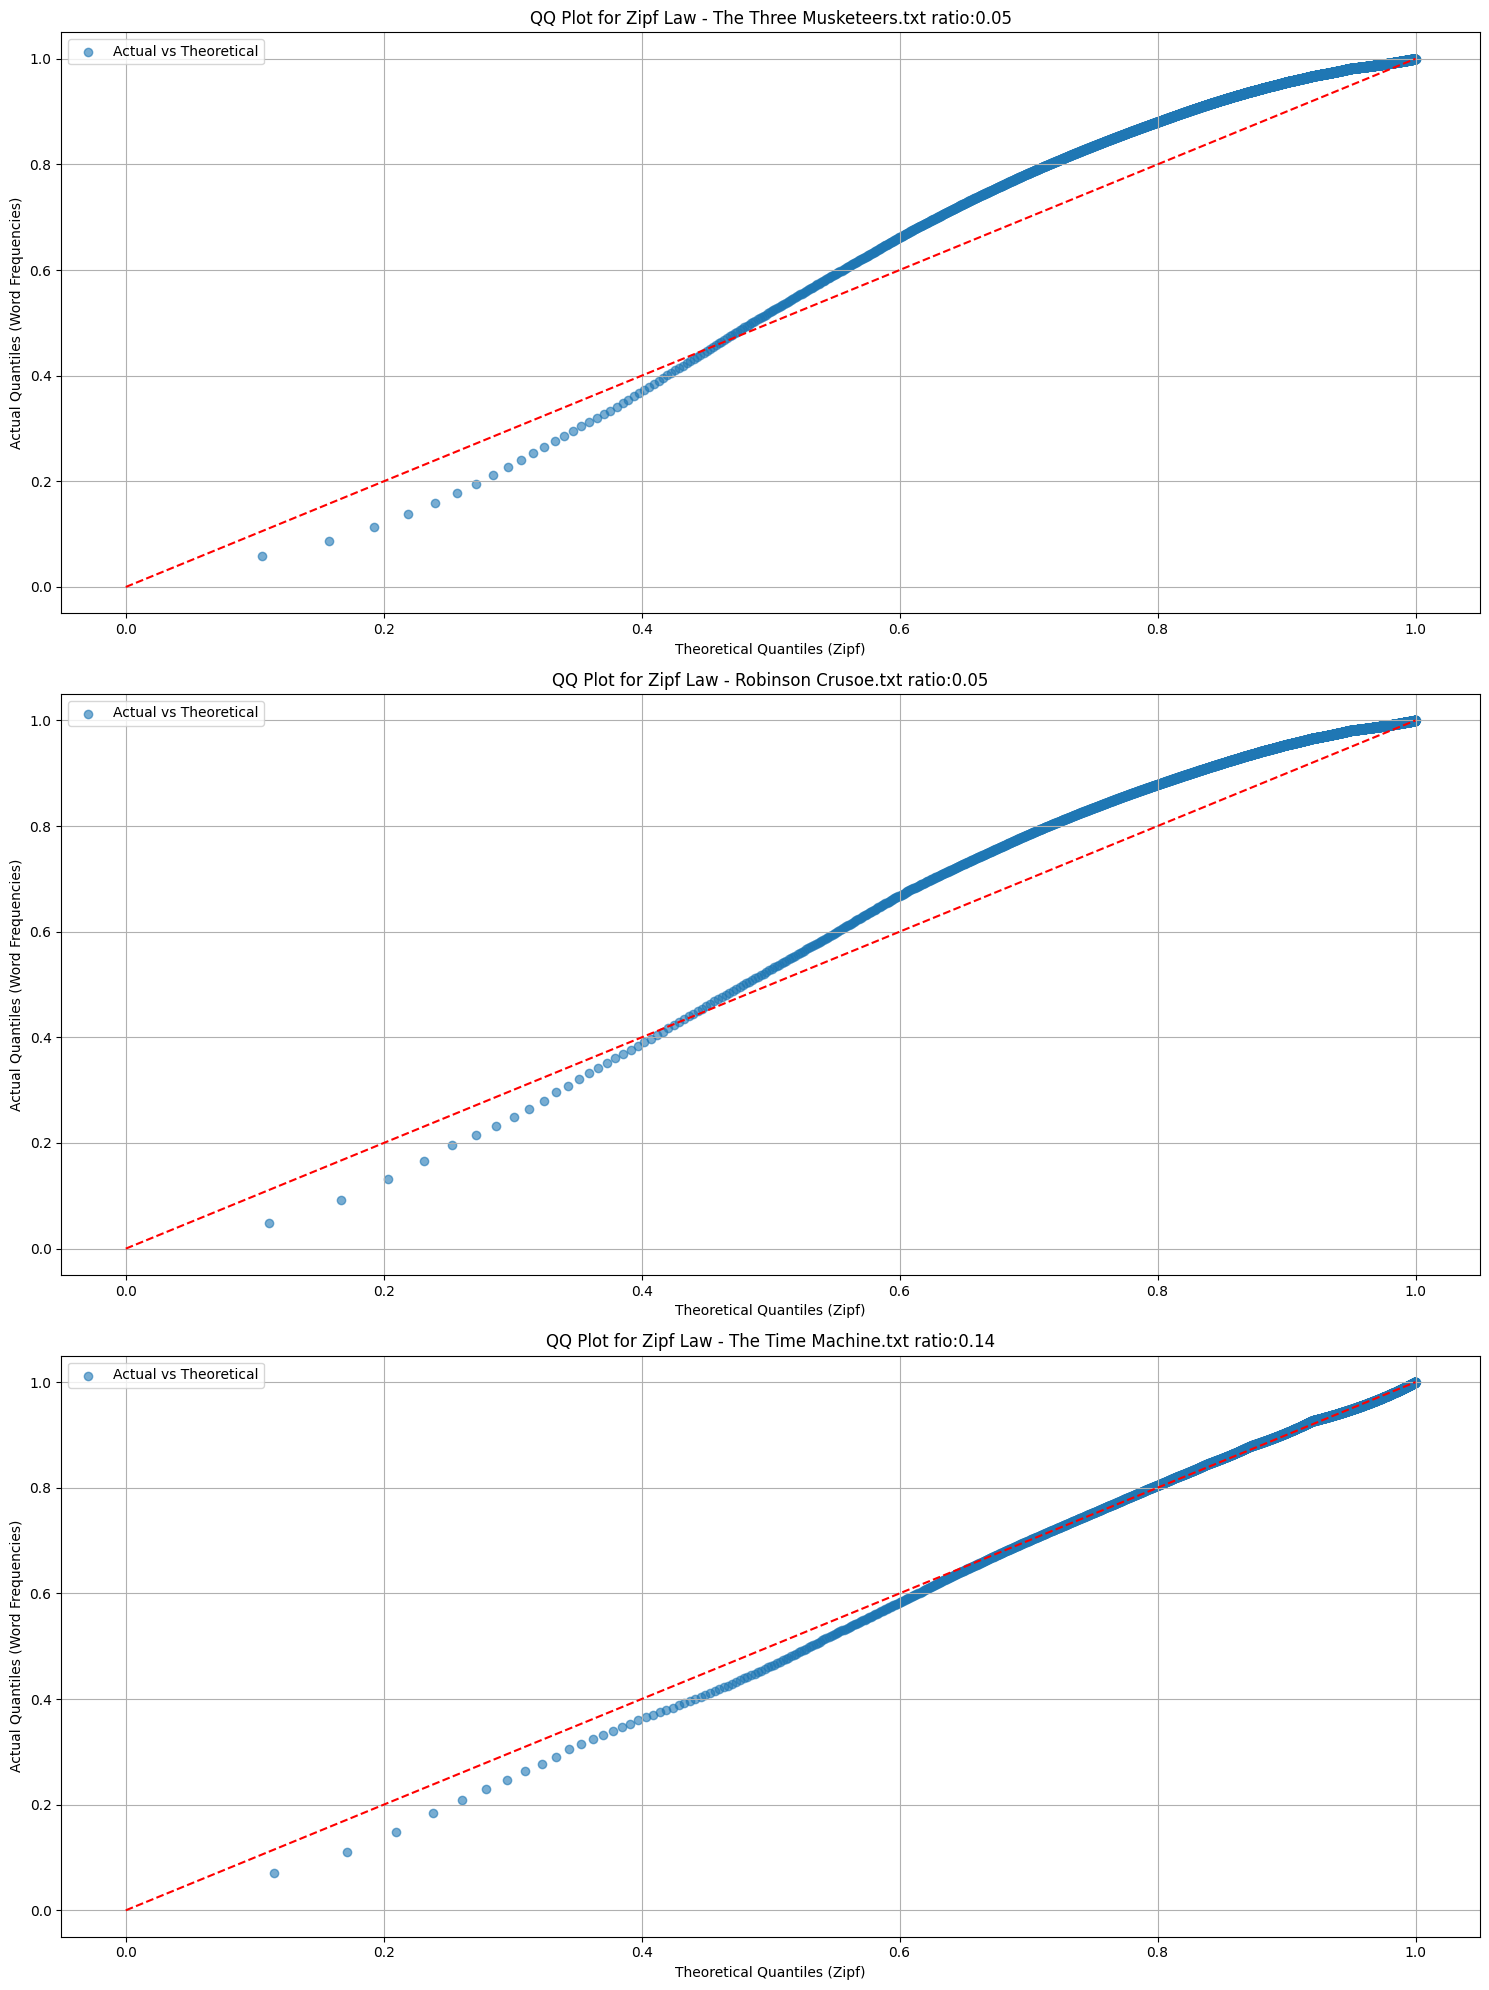

In [9]:
novel_path = 'novel'

novel_frequencies = read_and_collect_frequencies_from_directory(novel_path)

plot_qq_for_zipf_law(novel_frequencies, s=1.008, row=3, col=1)

### Conclusion for Experiment 3
These 3 Advanture Novels basically meet the case that parameter s is greater than 1, but some deviations may still be due to genres and writing habits.

Among 3 experiments, the ratio of the number of unique words to the number of all words spams a relatively wide range from .05 to .48. Within this range, both cases of following Zipf’ Law distribution or not could exist. Therefore, this metric may not be able to interpret the property of the Zipf' Law distribution, or help judge the text’s distribuion before getting the QQ plot.

#### Resources:
1. https://www.infobooks.org/pdfview/10898-robinson-crusoe-daniel-defoe/
2. https://www.infobooks.org/pdfview/10900-the-three-musketeers-alexandre-dumas/
3. https://www.infobooks.org/pdfview/7588-the-time-machine-h-g-wells/